The Black-Scholes PDE is as follows:
$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$
The initial conditions are subject to change depnding on the type of derivative we are trying to compute. For a European call option, an analytical solution exists, and is formalized with the following initial conditions:
$$\begin{equation} \label{eq1}
\begin{split}
C(0, t) &= 0, \; \forall t \in [0, T] \\
C(S,t) &= S - Ke^{-r(T-t)} \text{ as } S \rightarrow \infty\\
C(S,T) &= \text{max}(S-K,0), \; S \in [0, \infty).
\end{split}\end{equation}
$$

<!---The second boundary conditions implies
$$
C(S, t) \rightarrow S \text{ as } S \rightarrow \infty.
$$
--->
We see that a European call option will have value of $0$ except for the moment of expiration, and otherwise follow the price of the stock discounted by the risk-free interest rate. For exercise price $K$, ... 

We transform Black-Scholes PDE into heat equation. Let $\tau = T - t$, $x = \text{ln}(\frac{S}{K})$.
$$
\frac{\partial u}{\partial \tau} = \frac{\sigma^2}{2} \frac{\partial^2 u}{\partial x^2}, \; x \in (-\infty, \infty), \; \tau \in (0, T)\\
u(x, 0) = e^{\alpha x} V_0(K e^{x})
$$
????

In [2]:
using LinearAlgebra
using SparseArrays

K = 50 #exercise price
r = 0.04 #interest rate
D = 0.0 #dividend rate
sig = 0.4 #volatility of S
L = 2
n = 20
h = L/n
T = 1
m = 12
k = T/m

function alpha(i)
   return (r * i * dt - sig^2 * i^2 * dt) / 2
end

# alph = (r-D)/(sig^2) - .5
# bet = (r+D)/2 + sig^2/8 + (r-D)^2/(2*sig^2)

function beta(i)
   return 1 + sig^2 * i^2 * dt
end

function gamma(i)
   return -(sig^2 * i^2 * dt + r * i * dt) / 2
end

function matrix_A(dim)
    beta_diag = beta.(1:dim)
    alpha_diag = alpha.(2:dim)
    gamma_diag = gamma.(1:dim-1)
    A = sparse(Tridiagonal(alpha_diag, beta_diag, gamma_diag))
    return A
end

# function func0(S, i)
#     if S == 0
#         return 0
#     else
#         return exp(alpha(i)*S)*(S*exp(r*S) - K*exp(r*S))
#     end
# end

function phi(tau)
    return 0
end

function psi(tau)
    return K*exp(alph*L + bet*tau)*(exp(L-D*tau) - exp(-r*tau))
end

function func0(x)
    return K*exp(alph*x)*max(0, exp(x)-1)
end

# S_pts = collect(0:dS:200)
# u0 = func0.(S_pts, 1:length(S_pts))
# A = matrix_A(length(S_pts))
# delta = 1e-3

x = collect(-L:h:L)
tau = collect(0:k:T)

u0 = func0.(x)
dim = length(u0)
print(dim)

a = -.5*sig^2*k/h^2
b = 1-2*a
A = sparse(Tridiagonal(repeat([a], dim-1), repeat([b], dim), repeat([a], dim-1)))

41

41×41 SparseMatrixCSC{Float64, Int64} with 121 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁

In [82]:
K = 100 #exercise price
maxS = 300 #max stock price
r = 0.12 #interest rate
sig = 0.1 #volatility of S
T = 1
dS = 1
dt = 0.01

function alpha(i)
   return (sig^2 * i^2 * dt - r * i * dt) / 2
end

function beta(i)
   return -1/dt - sig^2 * i^2 - r
end

function gamma(i)
   return (sig^2 * i^2 * dt + r * i * dt) / 2
end

function matrix_A(dim)
    beta_diag = beta.(1:dim)
    alpha_diag = alpha.(2:dim)
    gamma_diag = gamma.(1:dim-1)
    A = sparse(Tridiagonal(alpha_diag, beta_diag, gamma_diag))
    return A
end

function terminal(S)
    return max(0, S-K)
end

function func0(S)
    return K*exp(-r*T*terminal(S)-1)
end

S = collect(0:dS:maxS)
tau = collect(0:dt:T)

u0 = convert(Array{Float64}, func0.(S))
print(u0)
dim = length(u0)
A = matrix_A(dim)
A[1,end] = a
A[end, 1] = a

function Trapezoid(dt,T,u0,A)
    N = T/dt
    u = copy(u0)
    len = size(A)[1]
    for i = 1:N
        u = (sparse(I, len, len)-dt/2*A)\((sparse(I, len, len)+dt/2*A)*u)
    end
    return u
end

u = Trapezoid(dt,T,u0,A)
#print(u)
# figure(7,figsize=(5,5))
# plot(collect(1:dim), u[:,cnt])
# title("Solution")

[36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235, 36.787944117144235,

301-element Vector{Float64}:
  6.401288261207876e-23
  7.060298304375397e-29
  1.0513442244674695e-34
  1.8556464746121265e-40
  4.019537118012617e-46
  3.775293945667602e-47
  3.177092454730005e-47
  2.603236329143061e-47
  2.0766334440921588e-47
  1.6126119405562585e-47
  1.2189337831961757e-47
  8.967307698938575e-48
  6.419810408857562e-48
  ⋮
  6.261767394392973e-28
  7.315210357235259e-28
  8.523775285932601e-28
  9.909247049510791e-28
  1.1293794644146258e-27
  2.4886736129244753e-27
 -5.416359574411192e-26
  2.077608708700265e-24
 -5.812369701672467e-23
  1.1534937846035984e-21
 -1.4498743897530465e-20
  8.70614267734552e-20

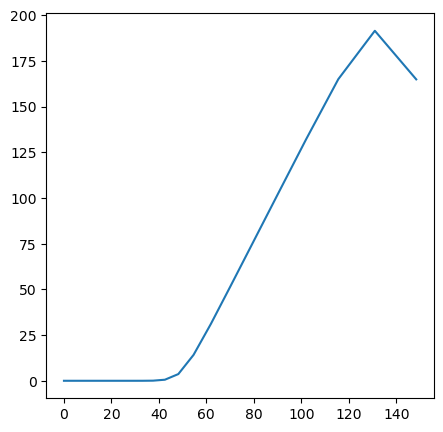

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.417853991482887, 11.402465793627712, 19.31706785250042, 28.285486932151546, 38.448037138713225, 49.963715184492564, 63.01268794808302, 77.7991112492567, 94.55432393937292]


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89896c9dc0>

In [83]:
K = 50 #exercise price
r = 0.04 #interest rate
D = 0.12 #dividend rate
sig = 0.4 #volatility of S
L = 5
n = 40
h = L/n
T = 1
m = 12
k = T/m

function funcu(x)
    a = 2*r/sig^2
    return exp(-r*T)*max(0, exp(x) - K)
    #return max(exp(1/2*(a+1)*x)-exp(1/2*(a-1)*x), 0)
end

alph = (r-D)/(sig^2) - .5
bet = (r+D)/2 + sig^2/8 + (r-D)^2/(2*sig^2)
x = collect(-L:h:L)
tau = collect(0:k:T)

u0 = funcu.(x)
dim = length(u0)
println(u0)

a = .5*sig^2*k/h^2
b = 1-2*a
A = sparse(Tridiagonal(repeat([a], dim-1), repeat([b], dim), repeat([a], dim-1)))

function ForwardEuler(dt,T,u0,A)
    u = copy(u0)
    N = T/dt
    for i = 1:N
        u = u + dt*A*u
    end
    return u
end

using PyPlot

rv = ForwardEuler(k,T,u0,A)
figure(6,figsize=(5,5))
plot(exp.(x), rv)

In [84]:
function tau(t)
    return T - t
end

function u(tau)
    return C*
end

function x(S,tau)
    return log(S/K) + (r-1/2*sig^2)*tau
end

LoadError: cannot define function tau; it already has a value

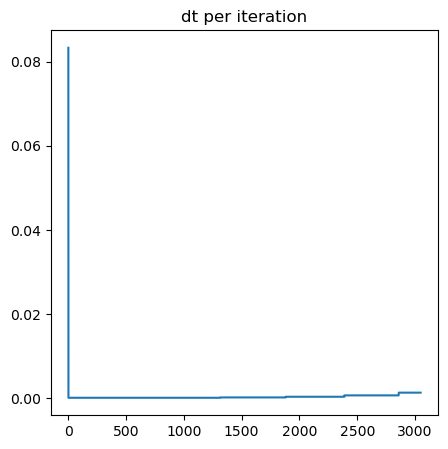

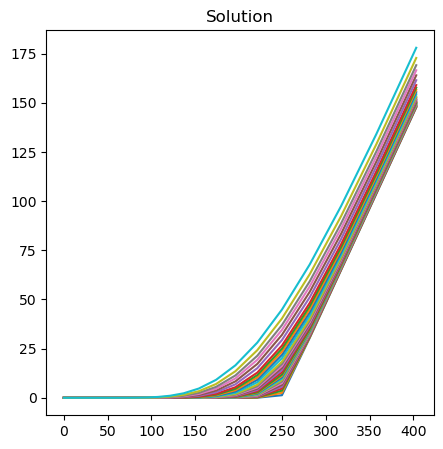

[2.2876807820487895e-233, 2.2876807820487895e-233, 1.6883952830487277e-230, 1.2338132188914028e-227, 8.91446660612482e-225, 6.367453215021133e-222, 4.495866076693386e-219, 3.137544018319742e-216, 2.1639422934814353e-213, 1.4747902967975498e-210, 9.930972398202144e-208, 6.606586065537607e-205, 4.341420583446262e-202, 2.817736353440807e-199, 1.8060321867438264e-196, 1.1430065743720355e-193, 7.141839297575546e-191, 4.4050209140607e-188, 2.6816326739222923e-185, 1.6110136360732824e-182, 9.549513344250574e-180, 5.584406896073327e-177, 3.2211911724131546e-174, 1.8324303907336605e-171, 1.0278646098061593e-168, 5.684150832992971e-166, 3.09840484024058e-163, 1.664458557161321e-160, 8.810226373736603e-158, 4.594041790047842e-155, 2.3594379927478774e-152, 1.1932658686566075e-149, 5.941380290311834e-147, 2.911806325157568e-144, 1.4043102374988835e-141, 6.6632529513714506e-139, 3.1097540450892798e-136, 1.4271597318651255e-133, 6.438912236034713e-131, 2.8551470522821143e-128, 1.243938976996899e-125,

In [3]:
K = 250 #exercise price
r = 0.04 #interest rate
D = 0 #dividend rate
sig = 0.4 #volatility of S
L = 6
n = 50
h = L/n
T = 1
m = 12
k = T/m

function funcu(x)
    #a = 2*r/sig^2
    return exp(-r*T)*max(0, exp(x) - K)
    #return max(exp(1/2*(a+1)*x)-exp(1/2*(a-1)*x), 0)
end

alph = (r-D)/(sig^2) - .5
bet = (r+D)/2 + sig^2/8 + (r-D)^2/(2*sig^2)
x = collect(-L:h:L)
tau = collect(0:k:T)

u0 = funcu.(x)
dim = length(u0)

A = sparse(Tridiagonal(repeat([1], dim-1), repeat([-2], dim), repeat([1], dim-1)))
A[1, 1] = 1
A[1, 2] = -2
A[1, 3] = 1
A[end, end - 2] = 1
A[end, end - 1] = -2
A[end, end] = 1
A = 1/h^2 * A * sig^2/2
function prop(T,dt,u0,A)
    u = copy(u0)
    k1 = A*u
    k2 = A*(u + dt*2*k1/3)
    k3 = A*(u + dt*2*k2/3)
    u = u + dt*(k1/4 + 3*k2/4)
    return u
end

function est(T,dt,u0,A)
    u = copy(u0)
    k1 = A*u
    k2 = A*(u + dt*2*k1/3)
    k3 = A*(u + dt*2*k2/3)
    u = u + dt*(k1/4 + 3*k2/8 + 3*k3/8)
    return u
end

function rk23(T,dt,u0,A,delta)
    u = ones(size(A)[1], 1)
    cnt = 1
    t = 0
    dt_arr = [dt]
    u[:,1] = copy(u0)
    t += dt
    curr = u[:,cnt]
    utemp = prop(T,dt,curr,A)
    uest = est(T,dt,curr,A)
    while t <= T
        tau = 1/6*norm(utemp - uest)
        if tau > delta*dt
            dt = dt/2
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        elseif tau <= 1/10*delta*dt
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            dt = 2*dt
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        else
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        end
    end
    return u, dt_arr, cnt
end

using PyPlot

u, dt_arr, cnt = rk23(T,k,u0,A,1e-5)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
for i = 1:cnt
    if i % 100 == 0
        plot(exp.(x), u[:,i])
    end
end
title("Solution")

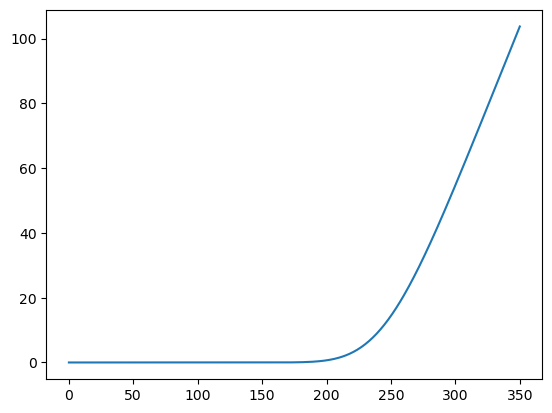

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f898dbcf490>

In [114]:
K = 250 #exercise price
r = 0.03 #interest rate
D = 0 #dividend rate
sig = 0.15 #volatility of S

using Distributions

dist = Normal()

function d1(S, tau)
    return (log(S/K)+(r+1/2*sig^2)*tau)/(sig*sqrt(tau))
end

function d2(S, tau)
    return d1(S, tau) - sig * sqrt(tau)
end

function V(S, tau)
    return S*cdf(dist, d1(S,tau))-K*exp(-r*tau)*cdf(dist, d2(S,tau))
end

function black_scholes(S)
    n = length(S)
    t = LinRange(0,.5,n)
    rv = zeros(n)
    for i = 1:n
        tau = T - t[i]
        rv[i] = V(S[i], tau)
    end
    return t, rv
end

using PyPlot
t, rv = black_scholes(collect(0:350))
plot(collect(0:350), rv)

In [87]:
function rk23StepAlgorithm(T,dt,u0,A,delta)
    u = ones(size(A)[1], 1)
    cnt = 1
    t = 0
    dt_arr = [dt]
    u[:,1] = copy(u0)
    t += dt
    curr = u[:,cnt]
    utemp = prop(T,dt,curr,A)
    uest = est(T,dt,curr,A)
    while t <= T
        tau = 3/8*norm(utemp - uest)
        new_dt = dt * (delta/tau)^(1/3)
        if tau > 4 * delta
            dt = new_dt
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        else
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            curr = u[:,cnt]
            dt = new_dt
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        end
    end
    return u, dt_arr, cnt
end

rk23StepAlgorithm (generic function with 1 method)

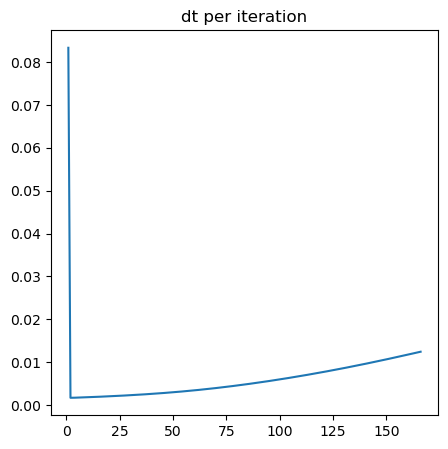

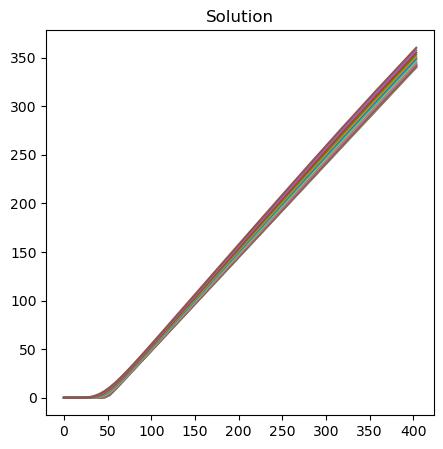

PyObject Text(0.5, 1.0, 'Solution')

In [108]:
u, dt_arr, cnt = rk23StepAlgorithm(T,k,u0,A,1e-6)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
for i = 1:cnt
    if i % 10 == 0
        plot(exp.(x), u[:,i])
    end
end
title("Solution")

In [89]:
function rk23DoubleStep(T, dt, u0, A, delta)
    u = ones(size(A)[1], 1)
    cnt = 1
    t = 0
    dt_arr = [dt]
    u[:,1] = copy(u0)
    t += dt
    curr = u[:,cnt]
    utemp = prop(T,dt,curr,A)
    uest = prop(T,dt/2,prop(T,dt/2, curr,A),A)
    while t <= T
        tau = 8/7 *norm(utemp - uest)
        if tau > delta
            dt = dt/2
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        elseif tau <= 1/10*delta
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            dt = 2*dt
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = prop(T,dt/2,prop(T,dt/2, curr,A),A)
        else
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = prop(T,dt/2,prop(T,dt/2, curr,A),A)
        end
    end
    return u, dt_arr, cnt   
end

rk23DoubleStep (generic function with 1 method)

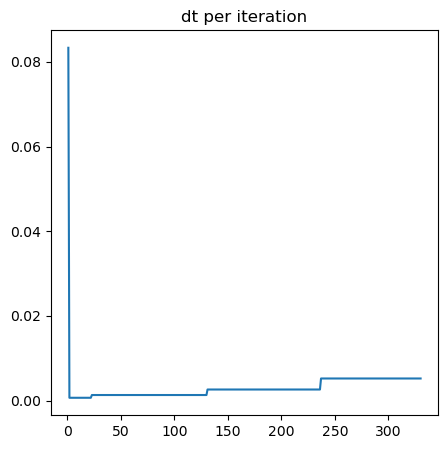

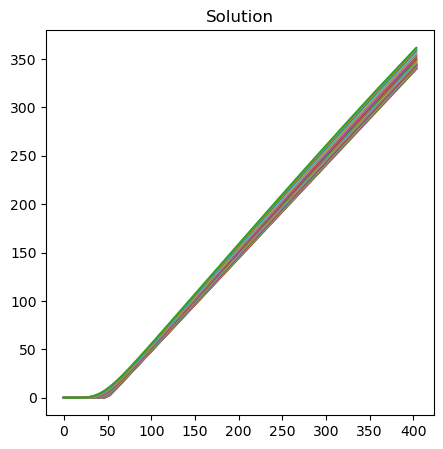

PyObject Text(0.5, 1.0, 'Solution')

In [109]:
u, dt_arr, cnt = rk23DoubleStep(T,k,u0,A,1e-6)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
for i = 1:cnt
    if i % 10 == 0
        plot(exp.(x), u[:,i])
    end
end
title("Solution")

In [91]:
function rk23DoubleStepAlgorithm(T, dt, u0, A, delta)
    u = ones(size(A)[1], 1)
    cnt = 1
    t = 0
    dt_arr = [dt]
    u[:,1] = copy(u0)
    t += dt
    curr = u[:,cnt]
    utemp = prop(T,dt,curr,A)
    uest = prop(T,dt/2,prop(T,dt/2, curr,A),A)
    while t <= T
        tau = 8/7 *norm(utemp - uest)
        new_dt = dt * (delta/tau)^(1/3)
        if tau > 4 * delta
            dt = new_dt
            utemp = prop(T,dt,curr,A)
            uest = prop(T,dt/2,prop(T,dt/2, curr,A),A)
        else
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            curr = u[:,cnt]
            dt = new_dt
            utemp = prop(T,dt,curr,A)
            uest = prop(T,dt/2,prop(T,dt/2, curr,A),A)
        end
    end
    return u, dt_arr, cnt
end

rk23DoubleStepAlgorithm (generic function with 1 method)

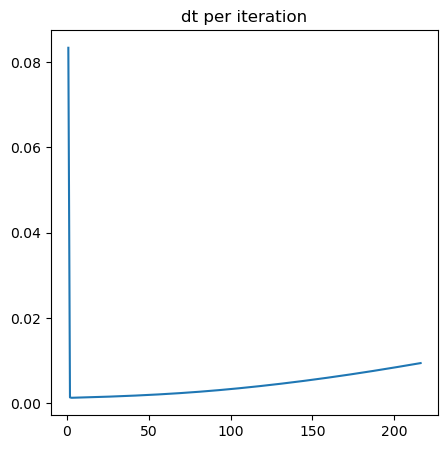

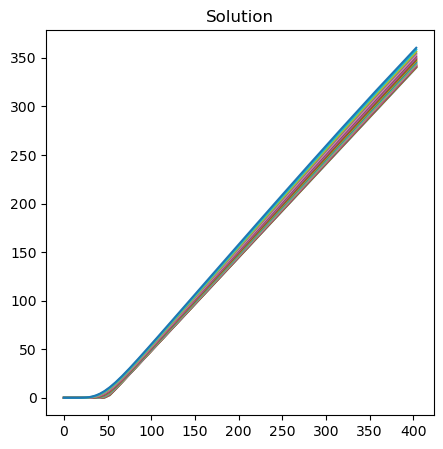

PyObject Text(0.5, 1.0, 'Solution')

In [110]:
u, dt_arr, cnt = rk23DoubleStepAlgorithm(T,k,u0,A,1e-6)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
for i = 1:cnt
    if i % 10 == 0
        plot(exp.(x), u[:,i])
    end
end
title("Solution")